In [16]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
is_working_with_easy_dataset = True

In [17]:
def get_text(html_text):
    soup = BeautifulSoup(html_text)
    return soup.get_text()

def embed(model, txt):
    txt = [txt]
    embeddings = model.encode(txt)
    for sentence, embedding in zip(txt, embeddings):
        return embedding

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

## Loading in Dataset for Vectorization

In [120]:
if is_working_with_easy_dataset:
    input_train_filename = "jd_easy_train.csv"
    input_test_filename = "jd_easy_test.csv"
else:
    input_train_filename = "jd_difficult_train.csv"
    input_test_filename = "jd_difficult_test.csv"

jd_train = pd.read_csv(input_train_filename, keep_default_na=False)
jd_test = pd.read_csv(input_test_filename, keep_default_na=False)

In [121]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [122]:
embedding_vectors_train = list(
    pd.Series.tolist(jd_train.description.apply(lambda x: embed(model, get_text(x)))))
embedding_train = pd.concat(
    [jd_train.category, pd.DataFrame(embedding_vectors_train)], axis=1)
embedding_train

,category,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,software+engineer,-0.007818,0.015209,-0.032915,-0.040774,-0.075819,-0.122257,0.003905,0.105021,-0.081435,...,0.036517,0.067738,0.017234,-0.021146,-0.005016,0.052575,0.016892,0.011725,0.031423,0.008097
1,arts,-0.039281,-0.037813,-0.002049,-0.079996,-0.009300,0.014721,0.028362,-0.028484,-0.047296,...,0.061370,0.030016,-0.020944,0.025066,-0.054447,0.042434,-0.016480,-0.065129,-0.121761,0.036031
2,hr,-0.099071,0.067754,-0.018720,0.065808,-0.019722,-0.006825,-0.010283,0.001540,-0.087364,...,0.081999,0.114448,0.022363,-0.051149,0.002981,0.086356,0.092362,-0.042364,-0.033669,0.060429
3,arts,-0.000244,-0.010329,0.005088,0.019951,0.031961,-0.004796,-0.056017,0.008362,-0.058531,...,0.018572,0.015595,0.026521,0.006298,-0.024210,0.076719,-0.001265,-0.029895,-0.037964,0.052187
4,arts,0.037742,-0.058576,0.017413,-0.007462,-0.010717,-0.022504,-0.016252,0.022974,-0.052209,...,0.015944,0.056351,0.060758,0.049852,-0.018264,0.075948,0.001910,-0.011242,-0.045209,0.029765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,software+engineer,-0.092087,0.031149,-0.008015,-0.022320,-0.046425,-0.083988,0.008692,0.036745,-0.129390,...,0.008609,0.064561,-0.016291,-0.005272,-0.021538,0.051470,0.078117,-0.018555,-0.036695,-0.013603
3178,sales,-0.078644,0.031273,0.041027,-0.058212,-0.068799,0.024472,0.047536,0.047297,-0.061370,...,-0.022879,0.019196,0.019246,-0.004855,0.016442,0.089635,0.074209,-0.086454,-0.098238,0.072741
3179,arts,-0.101251,0.041866,-0.005444,-0.011291,-0.032258,-0.016939,0.026778,0.046210,-0.083376,...,0.004621,0.021080,0.026186,0.022296,-0.041951,0.082195,0.048774,-0.097376,-0.085289,0.013674
3180,hr,-0.051157,0.022184,0.029747,0.018414,-0.007712,-0.003600,0.016207,0.049001,-0.018576,...,0.000053,0.008966,-0.015656,-0.005649,-0.080121,0.053882,0.070258,-0.079552,-0.019765,0.002172


In [123]:
embedding_vectors_test = list(
    pd.Series.tolist(jd_test.description.apply(lambda x: embed(model, get_text(x)))))
embedding_test = pd.concat(
    [jd_test.category, pd.DataFrame(embedding_vectors_test)], axis=1)
embedding_test

,category,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,software+engineer,-0.113818,0.008952,-0.004451,0.003387,0.041243,-0.074476,0.027237,0.074545,-0.080968,...,0.016368,0.115178,0.065218,-0.074784,0.057262,0.082102,0.059299,-0.031293,0.007032,0.071702
1,sales,-0.019982,-0.019572,-0.043766,0.038807,-0.021798,-0.003498,-0.008579,-0.007094,0.017747,...,0.023369,-0.032173,-0.008954,-0.028408,-0.041258,-0.016728,0.078255,-0.043575,0.043920,-0.008786
2,sales,-0.061115,0.037327,-0.035323,0.007244,-0.014231,0.054096,0.095702,0.017702,-0.064049,...,0.024937,0.007117,0.029717,0.036748,-0.017619,0.084793,0.017758,-0.004776,-0.067190,0.031323
3,sales,-0.110860,0.012782,-0.030584,-0.077872,-0.102458,0.048481,0.027282,0.055432,-0.007119,...,-0.057282,0.060048,0.012040,0.056503,-0.008248,0.102686,-0.004278,-0.015446,-0.055078,0.049244
4,arts,-0.044880,0.017243,0.052809,-0.012010,0.038006,-0.025841,0.002447,0.005194,-0.023129,...,0.014638,0.062186,0.076078,-0.041519,-0.023763,0.048595,0.060352,-0.011345,-0.059987,0.039882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,software+engineer,-0.131392,-0.029033,-0.082744,-0.039305,-0.028481,-0.063193,-0.057688,0.128488,-0.072210,...,-0.023796,0.086397,-0.071659,-0.031082,-0.003570,0.047519,0.033251,-0.166673,-0.007538,-0.031994
792,software+engineer,-0.043274,-0.032123,0.041134,-0.017565,0.032743,-0.072493,0.013035,-0.040865,0.005068,...,0.003571,0.061880,0.018539,-0.087545,0.026615,0.099625,0.018813,-0.029922,0.014897,-0.003446
793,software+engineer,-0.006800,-0.087576,-0.029101,-0.043830,-0.068833,-0.016611,0.032965,0.086794,-0.112048,...,0.093700,0.060009,-0.031102,0.073509,0.054705,0.061826,0.028178,-0.001595,-0.046012,-0.033700
794,hr,-0.128770,0.043694,-0.002058,0.047944,-0.053523,0.042907,0.058572,-0.007716,-0.058442,...,-0.018871,0.036778,-0.042918,-0.002689,-0.052095,0.123027,0.064848,-0.024640,0.003905,0.014744


In [124]:
if is_working_with_easy_dataset:
    output_train_filename = "embedding_easy_train.csv"
    output_test_filename = "embedding_easy_test.csv"
else:
    output_train_filename = "embedding_difficult_train.csv"
    output_test_filename = "embedding_difficult_test.csv"

embedding_train.to_csv(output_train_filename, index=False)
embedding_test.to_csv(output_test_filename, index=False)

## Start of RNN building

We will first create an RNN model on the easy dataset, analyse the results, and then create the RNN model on the hard dataset

### Easy Dataset (Distinct Job Categories)

In [2]:
is_working_with_easy_dataset = True

In [3]:
if is_working_with_easy_dataset:
    input_train_filename = "embedding_easy_train.csv"
    input_test_filename = "embedding_easy_test.csv"
else:
    input_train_filename = "embedding_difficult_train.csv"
    input_test_filename = "embedding_difficult_test.csv"

In [4]:
jd_train = pd.read_csv(input_train_filename, keep_default_na=False)
jd_test = pd.read_csv(input_test_filename, keep_default_na=False)

In [5]:
jd_train

,category,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,software+engineer,-0.007818,0.015209,-0.032915,-0.040774,-0.075819,-0.122257,0.003905,0.105021,-0.081435,...,0.036517,0.067738,0.017234,-0.021146,-0.005016,0.052575,0.016892,0.011725,0.031423,0.008097
1,arts,-0.039281,-0.037813,-0.002049,-0.079996,-0.009300,0.014721,0.028362,-0.028484,-0.047296,...,0.061370,0.030016,-0.020944,0.025066,-0.054447,0.042434,-0.016480,-0.065129,-0.121761,0.036031
2,hr,-0.099071,0.067754,-0.018720,0.065808,-0.019722,-0.006825,-0.010283,0.001540,-0.087364,...,0.081999,0.114448,0.022363,-0.051149,0.002981,0.086356,0.092362,-0.042364,-0.033669,0.060429
3,arts,-0.000244,-0.010329,0.005088,0.019951,0.031961,-0.004796,-0.056017,0.008362,-0.058531,...,0.018572,0.015595,0.026521,0.006298,-0.024210,0.076719,-0.001265,-0.029895,-0.037964,0.052187
4,arts,0.037742,-0.058576,0.017413,-0.007462,-0.010717,-0.022504,-0.016252,0.022974,-0.052209,...,0.015944,0.056351,0.060758,0.049852,-0.018264,0.075948,0.001910,-0.011242,-0.045209,0.029765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,software+engineer,-0.092087,0.031149,-0.008015,-0.022320,-0.046425,-0.083988,0.008692,0.036745,-0.129390,...,0.008609,0.064561,-0.016291,-0.005272,-0.021538,0.051470,0.078117,-0.018555,-0.036695,-0.013603
3178,sales,-0.078644,0.031273,0.041027,-0.058212,-0.068799,0.024472,0.047536,0.047297,-0.061370,...,-0.022879,0.019196,0.019246,-0.004855,0.016442,0.089635,0.074209,-0.086454,-0.098238,0.072741
3179,arts,-0.101251,0.041866,-0.005444,-0.011291,-0.032258,-0.016939,0.026778,0.046210,-0.083376,...,0.004621,0.021080,0.026186,0.022296,-0.041951,0.082195,0.048774,-0.097376,-0.085289,0.013674
3180,hr,-0.051157,0.022184,0.029747,0.018414,-0.007712,-0.003600,0.016207,0.049001,-0.018576,...,0.000053,0.008966,-0.015656,-0.005649,-0.080121,0.053882,0.070258,-0.079552,-0.019765,0.002172


In [6]:
jd_test

,category,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,software+engineer,-0.113818,0.008952,-0.004451,0.003387,0.041243,-0.074476,0.027237,0.074545,-0.080968,...,0.016368,0.115178,0.065218,-0.074784,0.057262,0.082102,0.059299,-0.031293,0.007032,0.071702
1,sales,-0.019982,-0.019572,-0.043766,0.038807,-0.021798,-0.003498,-0.008579,-0.007094,0.017747,...,0.023369,-0.032173,-0.008954,-0.028408,-0.041258,-0.016728,0.078255,-0.043575,0.043920,-0.008786
2,sales,-0.061115,0.037327,-0.035323,0.007244,-0.014231,0.054096,0.095702,0.017702,-0.064049,...,0.024937,0.007117,0.029717,0.036748,-0.017619,0.084793,0.017758,-0.004776,-0.067190,0.031323
3,sales,-0.110860,0.012782,-0.030584,-0.077872,-0.102458,0.048481,0.027282,0.055432,-0.007119,...,-0.057282,0.060048,0.012040,0.056503,-0.008248,0.102686,-0.004278,-0.015446,-0.055078,0.049244
4,arts,-0.044880,0.017243,0.052809,-0.012010,0.038006,-0.025841,0.002447,0.005194,-0.023129,...,0.014638,0.062186,0.076078,-0.041519,-0.023763,0.048595,0.060352,-0.011345,-0.059987,0.039882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,software+engineer,-0.131392,-0.029033,-0.082744,-0.039305,-0.028481,-0.063193,-0.057688,0.128488,-0.072210,...,-0.023796,0.086397,-0.071659,-0.031082,-0.003570,0.047519,0.033251,-0.166673,-0.007538,-0.031994
792,software+engineer,-0.043274,-0.032123,0.041134,-0.017565,0.032743,-0.072493,0.013035,-0.040865,0.005068,...,0.003571,0.061880,0.018539,-0.087545,0.026615,0.099625,0.018813,-0.029922,0.014897,-0.003446
793,software+engineer,-0.006800,-0.087576,-0.029101,-0.043830,-0.068833,-0.016611,0.032965,0.086794,-0.112048,...,0.093700,0.060009,-0.031102,0.073509,0.054705,0.061826,0.028178,-0.001595,-0.046012,-0.033700
794,hr,-0.128770,0.043694,-0.002058,0.047944,-0.053523,0.042907,0.058572,-0.007716,-0.058442,...,-0.018871,0.036778,-0.042918,-0.002689,-0.052095,0.123027,0.064848,-0.024640,0.003905,0.014744


In [7]:
jd_train_X = jd_train.iloc[:, 1:]
jd_train_y = jd_train[["category"]]

jd_test_X = jd_test.iloc[:, 1:]
jd_test_y = jd_test[["category"]]

In [8]:
jd_test_y.value_counts()

category         
software+engineer    220
arts                 198
sales                197
hr                   181
dtype: int64

In [9]:
enc = OneHotEncoder(sparse=False)
enc.fit(jd_train_y);

In [10]:
enc.categories_

[array(['arts', 'hr', 'sales', 'software+engineer'], dtype=object)]

In [11]:
jd_train_y = enc.transform(jd_train_y)
jd_test_y = enc.transform(jd_test_y)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64), input_shape=(384, 1)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

2023-03-31 16:55:31.762630: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-31 16:55:31.762777: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro


In [13]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [14]:
history = model.fit(jd_train_X, jd_train_y, epochs=100, validation_steps=30, validation_data=(jd_test_X, jd_test_y))

Epoch 1/100


2023-03-31 16:55:32.328877: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-31 16:55:33.782230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-31 16:55:34.054399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-31 16:55:34.065783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-31 16:55:35.028264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-31 16:55:35.043796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 1.3857 - accuracy: 0.2678 - recall: 0.0000e+00 - precision: 0.0000e+00

2023-03-31 16:55:54.596196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-31 16:55:54.707521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-31 16:55:54.707576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 27s 225ms/step - loss: 1.3857 - accuracy: 0.2678 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.3852 - val_accuracy: 0.3568 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 19s 185ms/step - loss: 1.3845 - accuracy: 0.3297 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.3839 - val_accuracy: 0.3869 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/100
100/100 [==============================] - 19s 186ms/step - loss: 1.3808 - accuracy: 0.3463 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.3772 - val_accuracy: 0.3003 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/100
100/100 [==============================] - 19s 188ms/step - loss: 1.3679 - accuracy: 0.3413 - recall: 3.1427e-04 - precision: 0.2000 - val_loss: 1.3421 - val_accuracy: 0.3719 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/100
100/100 [===================

(0.0, 1.4497193932533263)

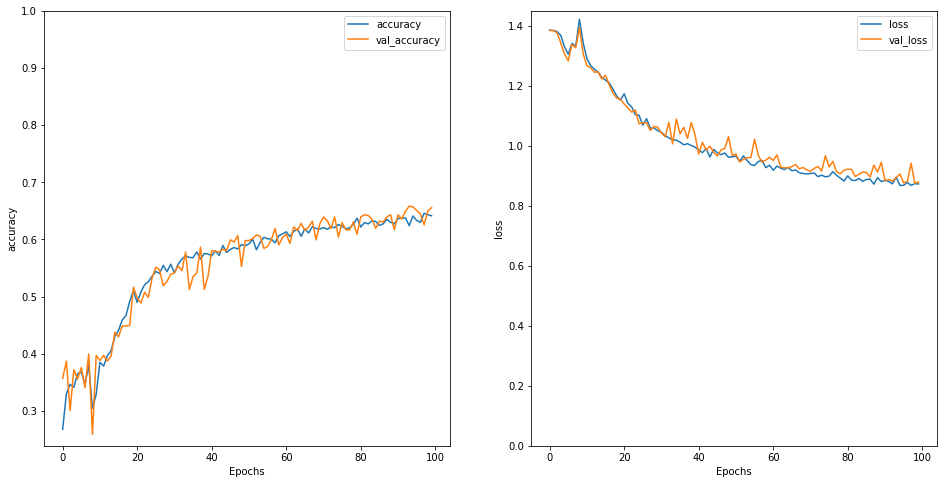

In [18]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

### Saving the model

In [19]:
model.save("tf_models/rnn_easy.h5")

### Hard Dataset (Distinct Job Categories)

In [20]:
is_working_with_easy_dataset = False

In [21]:
if is_working_with_easy_dataset:
    input_train_filename = "embedding_easy_train.csv"
    input_test_filename = "embedding_easy_test.csv"
else:
    input_train_filename = "embedding_difficult_train.csv"
    input_test_filename = "embedding_difficult_test.csv"

jd_train = pd.read_csv(input_train_filename, keep_default_na=False)
jd_test = pd.read_csv(input_test_filename, keep_default_na=False)

In [22]:
jd_train

,category,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,software+engineer,-0.067028,-0.037456,0.040710,-0.022643,-0.065919,-0.011505,0.014374,0.070613,-0.072635,...,0.073042,-0.004869,-0.012730,-0.012608,0.025585,0.136745,0.038581,-0.099147,0.001722,0.032735
1,software+engineer,-0.049825,-0.026897,-0.014653,-0.045330,-0.002588,-0.085351,-0.020295,-0.026342,-0.046522,...,0.153783,0.060030,0.053321,-0.115148,0.043106,0.170601,-0.040410,-0.039290,0.035469,0.022973
2,software+engineer,-0.109452,-0.018895,-0.011882,-0.049141,-0.065425,-0.020879,0.020536,0.049572,-0.068171,...,0.067979,0.060650,0.008373,-0.073202,0.039430,0.084493,-0.058907,0.041129,-0.041035,-0.106831
3,ui+ux,-0.059268,0.002888,0.038257,0.000755,-0.040839,0.018103,0.136779,0.048689,-0.019846,...,-0.003655,0.047657,0.028251,-0.037878,0.034004,0.074488,0.008779,-0.027154,-0.012630,0.000571
4,ui+ux,-0.012034,0.015511,-0.003249,-0.078507,0.065040,-0.028536,-0.031559,0.013882,0.022090,...,0.019392,0.086536,-0.006240,0.011584,-0.047290,0.095525,-0.002575,-0.077631,-0.090518,0.043476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,software+engineer,-0.079604,0.007492,-0.051706,-0.099018,-0.030773,-0.024738,-0.015718,0.143318,0.023419,...,0.076493,0.073352,0.047936,-0.024901,0.018558,-0.000389,0.032267,-0.109857,0.065948,0.012895
3176,cyber+security,-0.037670,0.031925,-0.013679,-0.005070,0.021368,0.001775,0.096207,0.094450,-0.042398,...,0.044399,0.110647,0.002972,-0.029953,0.052398,0.080780,0.036664,-0.094719,-0.029790,-0.003033
3177,ui+ux,-0.025617,0.061029,-0.011124,-0.026316,-0.066101,-0.050747,-0.006923,0.085535,-0.037942,...,0.042129,0.081157,0.015721,-0.066116,0.042122,0.063814,0.002575,-0.027617,0.005385,0.017316
3178,data+analyst,-0.060959,-0.039796,-0.022763,-0.039479,-0.041932,-0.040012,0.063920,0.067434,0.023722,...,0.052077,0.101755,-0.004031,-0.010030,0.046817,0.042863,-0.059085,-0.064276,-0.031612,-0.012527


In [23]:
jd_test

,category,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,data+analyst,-0.067792,-0.039427,-0.044609,0.047954,-0.020255,0.046215,0.005775,0.025648,-0.049265,...,-0.005009,0.040230,-0.025145,0.057344,-0.027139,0.044581,0.021295,-0.058819,-0.034744,0.034043
1,cyber+security,-0.031839,-0.009482,-0.023652,-0.019206,0.044170,-0.014529,0.033187,0.019848,-0.066667,...,0.024783,0.006127,0.019935,-0.044377,0.023766,0.079525,0.047992,-0.133125,-0.075094,0.007815
2,software+engineer,0.000286,0.063366,0.006427,-0.068235,0.004449,-0.010305,0.060434,-0.016027,-0.025250,...,0.045451,0.042614,0.058757,-0.078012,0.074350,0.160043,0.063957,-0.004549,-0.031632,0.029312
3,ui+ux,-0.057650,0.055610,0.026229,-0.047242,-0.035953,-0.046720,0.011318,0.081929,-0.048681,...,0.061916,0.065591,0.013310,-0.060660,0.049816,0.041116,-0.045918,0.072459,0.037671,0.065580
4,ui+ux,-0.089035,-0.014104,-0.008340,-0.051578,0.020056,-0.007032,0.044202,0.059013,-0.116712,...,0.083643,0.001030,0.027071,-0.058678,0.040474,0.126645,0.022273,-0.124107,-0.037943,0.056573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,software+engineer,-0.022442,-0.005181,0.047044,0.003137,0.017104,-0.020445,0.032614,-0.009681,-0.021284,...,0.108325,0.032602,0.049168,-0.024625,-0.012232,0.204267,0.024259,-0.055909,-0.024037,0.020142
791,cyber+security,-0.055603,0.017493,-0.050230,0.006790,0.034947,-0.006445,0.067512,-0.005287,0.004463,...,0.098699,0.018417,0.038070,-0.059501,0.065384,0.033054,0.055798,-0.029429,0.001252,-0.026993
792,ui+ux,-0.015606,-0.037002,-0.006399,-0.027400,0.058740,0.011265,-0.012748,0.020038,-0.022678,...,-0.017598,0.006824,0.028923,0.071740,0.012084,0.054748,0.011543,-0.043361,-0.041390,-0.008505
793,ui+ux,-0.106446,-0.016218,0.035964,0.002867,0.038787,-0.028620,-0.006793,0.039116,-0.063164,...,0.030134,0.044736,0.027246,-0.002019,0.009813,0.096749,0.042344,-0.058779,-0.027651,0.083697


## Splitting Dataset into Features and Target Vectors

In [24]:
jd_train_X = jd_train.iloc[:, 1:]
jd_train_y = jd_train[["category"]]

jd_test_X = jd_test.iloc[:, 1:]
jd_test_y = jd_test[["category"]]

In [25]:
jd_test_y.value_counts()

category         
cyber+security       212
software+engineer    211
ui+ux                200
data+analyst         172
dtype: int64

### Encoding Target Variables

In [26]:
enc = OneHotEncoder(sparse=False)
enc.fit(jd_train_y);

In [27]:
jd_train_y = enc.transform(jd_train_y)
jd_test_y = enc.transform(jd_test_y)

### RNN Model creation and training

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64), input_shape=(384, 1)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [29]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [30]:
history = model.fit(jd_train_X, jd_train_y, epochs=100, validation_steps=30, validation_data=(jd_test_X, jd_test_y))

Epoch 1/100


2023-03-31 17:32:11.153423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-31 17:32:11.447126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-31 17:32:11.447191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-31 17:32:12.396125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-31 17:32:12.411854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 1.3847 - accuracy: 0.3258 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00

2023-03-31 17:32:31.633751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-31 17:32:31.748790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-31 17:32:31.748819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 26s 220ms/step - loss: 1.3847 - accuracy: 0.3258 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - val_loss: 1.3834 - val_accuracy: 0.3635 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 17s 170ms/step - loss: 1.3804 - accuracy: 0.3903 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - val_loss: 1.3737 - val_accuracy: 0.4843 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 3/100
100/100 [==============================] - 17s 171ms/step - loss: 1.3354 - accuracy: 0.4179 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - val_loss: 1.2933 - val_accuracy: 0.3899 - val_recall_1: 0.0013 - val_precision_1: 1.0000
Epoch 4/100
100/100 [==============================] - 17s 169ms/step - loss: 1.2707 - accuracy: 0.3758 - recall_1: 0.0324 - precision_1: 0.8240 - val_loss: 1.2530 - val_accuracy: 0.3925 - val_recall_1: 0.0591 - val_precision_1: 0.8393
Epoch 5/100
100/100 [=======

(0.0, 1.4162383556365967)

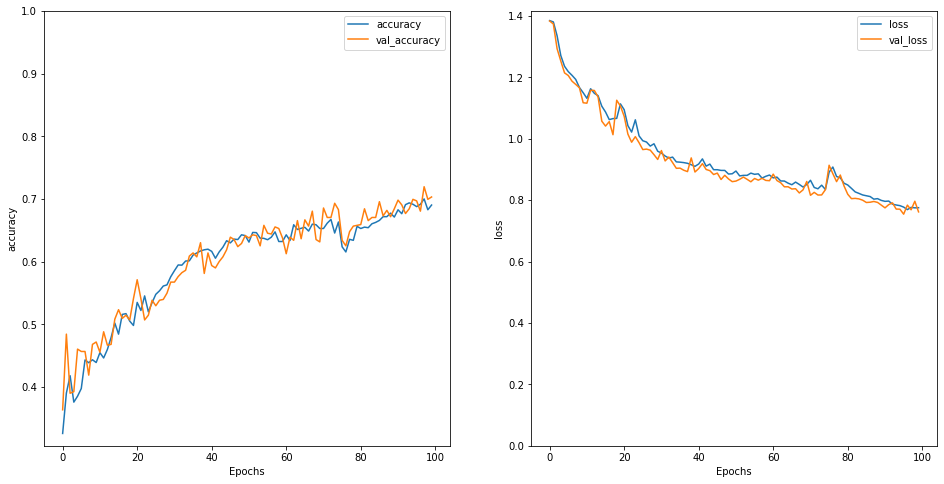

In [31]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

### Saving the model

In [32]:
model.save("tf_models/rnn_hard.h5")